## Galfit Results and Plots

In this notebook I create all the plots that require inputs from the Galfit  run / calculation of parameters based on the Galfit results.

I'm gonna write everything in a way that it will be very easy to re-run the notebook with updated Galfit catalogs.

In [1]:
#Import stuff
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
#import seaborn as sns
rcParams['font.family'] = 'serif'

# Adjust rc parameters to make plots pretty
def plot_pretty(dpi=200, fontsize=8):
    
    import matplotlib.pyplot as plt

    plt.rc("savefig", dpi=dpi)       # dpi resolution of saved image files
    # if you have LaTeX installed on your laptop, uncomment the line below for prettier labels
    plt.rc('text', usetex=True)      # use LaTeX to process labels
    plt.rc('font', size=fontsize)    # fontsize
    plt.rc('xtick', direction='in')  # make axes ticks point inward
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=10) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=10) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [0.5, 1.1]) # fix dotted lines

    return

plot_pretty()

### Define a function that creates jointplots

In [2]:
from matplotlib import gridspec
from scipy.stats import gaussian_kde

def jointPlot(data, dims,cols,bins,kde=False,**kwargs):
    '''
    data = our dataset - dimensions (:,2) or (:,4) depending on the dimension
    dims = 2 or 4 - 2 in case we have a joint plot of one type of data - 4 if we have two types of data
    cols = colors (1 or 2)
    '''
    # ============================================================
    # ============================================================
    # Define the max and mins of the first dataset
    x_min_1, x_max_1 = data[:,0].min(),data[:,0].max()
    y_min_1, y_max_1 = data[:,1].min(),data[:,1].max()
    
    # Now if dims = 4, find the min and max of the second dataset as well
    if (dims==4):
        x_min_2, x_max_2 = data[:,2].min(),data[:,2].max()
        y_min_2, y_max_2 = data[:,3].min(),data[:,3].max()
    
    # ============================================================
    # ============================================================
    # Define grid for subplots
    gs = gridspec.GridSpec(2, 2,wspace=0.2,hspace=0.2, width_ratios=[4, 1], height_ratios = [1, 4])
    
    # ============================================================
    # ============================================================
    #Create scatter plot
    fig = plt.figure(figsize=(5.5,5.5),facecolor='white')
    ax = plt.subplot(gs[1, 0],frameon = True)
    cax = ax.scatter(data[:,0], data[:,1],rasterized=True, color=cols[0], s=0.5, alpha=.6)
    # Now in case dims=4, add one more scatter plot
    if (dims==4):
        cax = ax.scatter(data[:,2], data[:,3], rasterized=True,color=cols[1], s=0.5, alpha=.6)
   
    ax.grid(ls='--', axis='both' ,alpha=0.6)
    
    ax.set_xlabel(kwargs['xlabel'],fontsize=11)
    ax.set_ylabel(kwargs['ylabel'],fontsize=11)
    # ===============================================================
    # ===============================================================
    # Lower and upper limits in the x and y directions
    x_low = kwargs['xlow']
    x_up = kwargs['xup']
    y_low = kwargs['ylow']
    y_up = kwargs['yup']
    # ===============================================================
    # ===============================================================
    #Create Y-marginal (right)
    axr = plt.subplot(gs[1, 1], sharey=ax, frameon = True, xticks = [],ylim=(y_low,y_up)) 
    axr.hist(data[:,1],bins=bins, color = cols[0],alpha=0.6, orientation = 'horizontal', normed = True)
    # In case dims = 4, add one more historgram
    if (dims==4):
        axr.hist(data[:,3],bins=bins, color = cols[1],alpha=0.6, orientation = 'horizontal', normed = True)
        
    
    axr.grid(ls='--', axis='both' ,alpha=0.6)
    
    
    # ===============================================================
    #Create X-marginal(top)
    axt = plt.subplot(gs[0,0], sharex=ax,frameon = True, yticks=[],xlim=(x_low,x_up))
    axt.hist(data[:,0],bins=bins, color = cols[0],alpha=0.6, normed = True)
    # In case dims = 4, add one more histogram
    if (dims==4):
        axt.hist(data[:,2],bins=bins, color = cols[1],alpha=0.6, normed = True)
        
    axt.grid(ls='--', axis='both' ,alpha=0.6)
    
    #Bring the marginals closer to the scatter plot
    fig.tight_layout(pad = 0.0)

    if kde:
        kdex_1=gaussian_kde(data[:,0])
        kdey_1=gaussian_kde(data[:,1])
        x_1= np.linspace(x_min_1,x_max_1,100)
        y_1= np.linspace(y_min_1,y_max_1,100)
        dx_1=kdex_1(x_1)
        dy_1=kdey_1(y_1)
        axr.plot(dy_1,y_1,color='k',linewidth=1)
        axt.plot(x_1,dx_1,color='k', linewidth=1)
        
        # And in case dims = 4, we have more kdes
        if (dims==4):
            kdex_2=gaussian_kde(data[:,2])
            kdey_2=gaussian_kde(data[:,3])
            x_2= np.linspace(x_min_2,x_max_2,100)
            y_2= np.linspace(y_min_2,y_max_2,100)
            dx_2=kdex_2(x_2)
            dy_2=kdey_2(y_2)
            axr.plot(dy_2,y_2,color='black', ls='--')
            axt.plot(x_2,dx_2,color='black', ls='--')
        
    return ax,axt,axr
    

### Import the catalog with the Galfit results now

In [3]:
from astropy.io import fits
Galfit_res = fits.open('y3_gold_2_2_lsbg_galfit_v3.0.fits')
#Galfit_res[1].header.keys

In [4]:
coadd_object_id = Galfit_res[1].data["COADD_OBJECT_ID"]
object_num = Galfit_res[1].data["OBJECT_NUMBER"] #what is this?
# Coordinates
RA = Galfit_res[1].data["RA"]
DEC = Galfit_res[1].data["DEC"]
# A, B image
A_IMAGE = Galfit_res[1].data["A_IMAGE"]
B_IMAGE = Galfit_res[1].data["B_IMAGE"]
# Effective radius 
R_eff = 0.263*Galfit_res[1].data["RE"]
R_eff_err = 0.263*Galfit_res[1].data["RE_ERR"]
# Sersic index
n_ser = Galfit_res[1].data["N"]
n_ser_err = Galfit_res[1].data["N_ERR"]
# Magnitudes
mag_g = Galfit_res[1].data["MAG_G"]
mag_r = Galfit_res[1].data["MAG_R"]
mag_i = Galfit_res[1].data["MAG_I"]
# Errors on magnitudes 
mag_g_err = Galfit_res[1].data["MAG_ERR_G"]
mag_r_err = Galfit_res[1].data["MAG_ERR_R"]
mag_i_err = Galfit_res[1].data["MAG_ERR_I"]

## Part I: LSBG properties

In this part I will make plots and some calculations describing the properties of our LSBG sample.
(Section 5 of our paper).


### Color-color plot

Let's start with the color-color plot in the $g-i$ - $g-r$ color space.

In [5]:
# Define the colors here
col_g_i = mag_g - mag_i
col_g_r = mag_g - mag_r
col_i_r = mag_i - mag_r

In [6]:
# Calculate and print the median of the g-i color
med_g_i = np.median(col_g_i)
print(med_g_i)

0.68865013


In [7]:
data = np.zeros((len(col_g_i[(col_g_i>-1.0)&(col_g_r<1.1)]),2))
data[:,1] = col_g_r[(col_g_i>-1.0)&(col_g_r<1.1)]
data[:,0] = col_g_i[(col_g_i>-1.0)&(col_g_r<1.1)]

//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


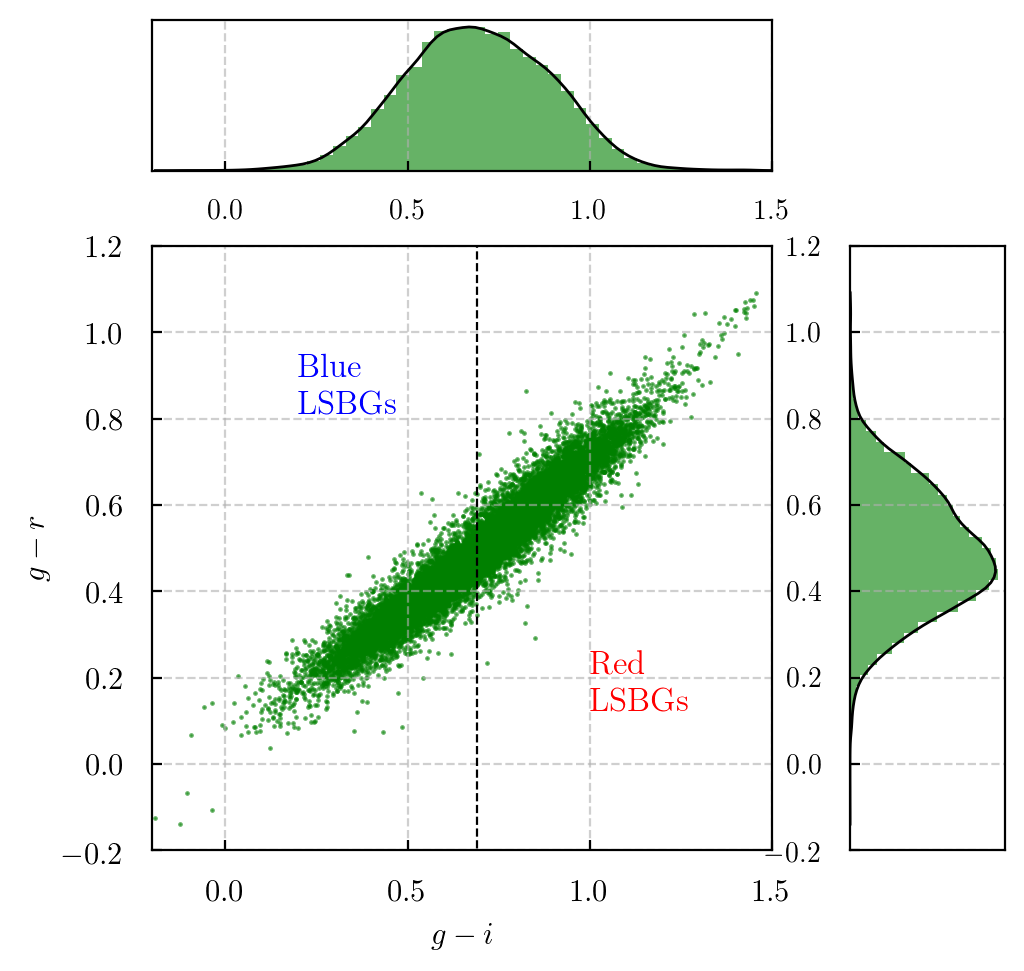

In [8]:
#import seaborn as sns
#sns.set()
# Return ax object for extras
ax,axt,axr = jointPlot(data, dims=2,cols=['g'],bins=50,kde=True,xlabel='$g-i$', ylabel='$g-r$', xlow=-0.2,xup=1.5,ylow=-0.2,yup=1.2)

ax.vlines(med_g_i,-0.25,1.25, color='k', linewidth=0.8,linestyle='--')
ax.text(0.2,0.81, 'Blue \n LSBGs', color='blue',fontsize=12)
ax.text(1.0,0.12, 'Red \n LSBGs', color='red',fontsize=12)

axr.tick_params(axis='both', labelsize=10)
axt.tick_params(axis='both', labelsize=10)
ax.tick_params(axis='both', labelsize=11)

plt.savefig('Color_color.pdf', dpi=100)
plt.show()

#### Calculate median of the red and blue galaxy populations

In [9]:
med_red = np.median(col_g_i[col_g_i>med_g_i])
med_blue = np.median(col_g_i[col_g_i<med_g_i])

print('Median of the red population:')
print(med_red)
print('Median of the blue population')
print(med_blue)

Median of the red population:
0.8316822
Median of the blue population
0.5547657


###  Mean surface brightness - radius relationship

Here I present the relationship between the mean surface brightness and effective radius.

The mean surface brightness can be calculated from the effective radius and the magnitude as:

\begin{equation}
\left\langle \mu \right\rangle_{eff} = m + 2.5\log (2\pi R_{eff}^2)
\end{equation}

where $m$ the apparent magnitude in the band under consideration.

In [10]:
mu_mean_g = mag_g + 2.5*np.log10(2.0*np.pi*(R_eff**2.0))

# Mean brightness - split in red and blue
mu_mean_g_red = mu_mean_g[(mu_mean_g>21)&(col_g_i>med_g_i)&(mu_mean_g<50)]
mu_mean_g_blue = mu_mean_g[(mu_mean_g>21)&(col_g_i<med_g_i)&(mu_mean_g<50)]


# Effective radius - split in red blue
r_eff_red = R_eff[(mu_mean_g>21)&(col_g_i>med_g_i)&(mu_mean_g<50)]
r_eff_blue = R_eff[(mu_mean_g>21)&(col_g_i<med_g_i)&(mu_mean_g<50)]

# Create a "dataset" compatible to the jointPlot function
dataset = np.zeros((len(mu_mean_g_blue),4))
dataset[:,0] = mu_mean_g_blue;dataset[:,1] = r_eff_blue
dataset[:,2] = mu_mean_g_red[:-1];dataset[:,3] = r_eff_red[:-1]


#plt.hist(mu_mean_g_blue[mu_mean_g_blue<50], bins=40)

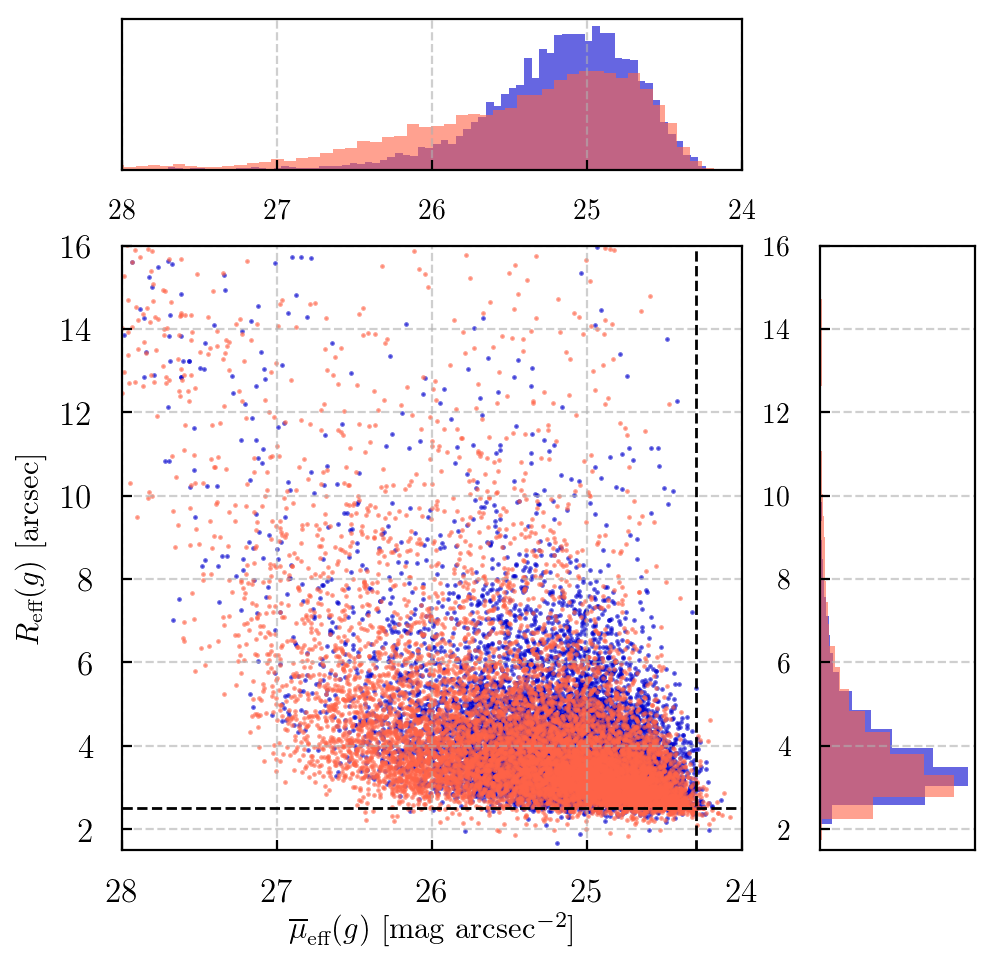

In [11]:
xlabel = '${\overline{\mu}}_{\mbox{\scriptsize{eff}}}(g)$ [mag arcsec$^{-2}$]'
#ylabel = '$r_{\mbox{\scriptsize{eff}}}(g)$ [arcsec]'
ylabel = '$R_{\mbox{\scriptsize{eff}}}(g)$ [arcsec]'
ax,axt,axr = jointPlot(dataset, dims=4,cols=['mediumblue','tomato'],bins=100,kde=False,xlabel=xlabel, ylabel=ylabel, xlow=28,xup=24,ylow=1.5,yup=16)
ax.vlines(24.3,1.5,16, color='k', linewidth=1.0,linestyle='--')
ax.hlines(2.5,28,24, color='k', linewidth=1.0,linestyle='--')


axr.tick_params(axis='both', labelsize=10)
axt.tick_params(axis='both', labelsize=10)
ax.tick_params(axis='both', labelsize=12)
ax.set_xticks([28,27,26,25,24])

plt.savefig('Eff_rad_surf_bright.pdf', dpi=100)
plt.show()

In [12]:
print(np.median(r_eff_blue))
print(np.median(r_eff_red))

perc = [50,60,80,90]
perc_blue = np.percentile(r_eff_blue, perc)
perc_red = np.percentile(r_eff_red, perc)

print(perc_blue)
print(perc_red)

print(np.median(mu_mean_g_red))
print(np.median(mu_mean_g_blue))

3.6443765
3.6727648
[3.64437652 3.90002789 4.74947891 5.8413559 ]
[3.67276478 4.02279234 5.31261158 7.45910978]
25.269482
25.12048


Calculate 16th, 50th and 84th percentiles in  μeffμeff 

In [13]:
perc = [16,50,84]

# Calculate for the blue galaxies
perc_blue = np.percentile(mu_mean_g_blue, perc)

# Calculate for the red galaxies
perc_red = np.percentile(mu_mean_g_red, perc)

# Now print them 
print('Percentiles for blue galaxies (16,50,68):')
print(perc_blue)
print('Percentiles for red galaxies (16,50,68):')
print(perc_red)

Percentiles for blue galaxies (16,50,68):
[24.72156685 25.12047958 25.63860321]
Percentiles for red galaxies (16,50,68):
[24.72136192 25.26948166 26.19384766]


###  Central surface brightness - sersic index relationship

For this part we will need to estimate the central surface brightness $\mu_0$. This is given by:

\begin{equation}
\mu_0 = \mu_e - \frac{2.5 b}{\ln(10)}
\end{equation}

$b$ can be calculated by solving the equation:

\begin{equation}
\Gamma(2n) = 2\gamma(2n,b),
\end{equation}
where:
\begin{equation}
\gamma(2n,x) = \int_0^x e^{-t}t^{2n-1} dt
\end{equation}
the incomplete gamma function.

Now, we have to estimate $\mu_e$. To do that we use the mean surface brightness, $\langle \mu \rangle_e$, calculated above.

We have that: 
\begin{equation}
\mu_e = \langle \mu \rangle_e + 2.5\log[f(n)]
\end{equation}

Where:
\begin{equation}
f(n) = \frac{ne^b}{b^{2n}}\Gamma(2n)
\end{equation}
and
\begin{equation}
\Gamma(2n) = \int_0^\infty e^{-x} x^{2n - 1} dx
\end{equation}


The final formula for $\mu_0$ is:

\begin{equation}
\mu_0 = \langle \mu \rangle_e + 2.5\log[f(n)] - \frac{2.5 b}{\ln(10)}
\end{equation}

with the needed parameters calculated as described above.

In [14]:
# First part, calculation of b for a given n. Write a function that does that.
from scipy.special import gamma
from scipy.special import gammainc # Note that the incomplete gamma function 
from scipy.optimize import root_scalar
n_ser = Galfit_res[1].data["N"]

def funct(x, *args):
    """
    The function to be minimized
    """
    n = args[0]
    fun = 2.0*gammainc(2.0*n,x) - 1.0
    return fun
    
def b_return(n):
    """
    This function returns the parameter b for a given
    Sersic index n, solving the equations described above
    """
    
    b_ret = root_scalar(funct, args=(n), method='bisect', bracket=[0.01, 40])
    return b_ret.root
    
b_n = np.zeros(len(n_ser))


for i in range(len(b_n)):
    b_n[i] = b_return(n_ser[i])
    
#b_n = 1.992*n_ser - 0.3271

In [15]:
# Now calculate the function f(n)
#n_ser = Galfit_res[1].data["N"]

f_n = (n_ser*np.exp(b_n)/(b_n**(2.0*n_ser)))*gamma(2.0*n_ser)

# Calculate central surface brightness 
mu_cent = mu_mean_g + 2.5*np.log10(f_n) -  2.5*b_n/np.log(10.0)

In [16]:
# Central surface brightness - split in red and blue
mu_cent_red = mu_cent[(mu_cent>16.0)&(col_g_i>med_g_i)]
mu_cent_blue = mu_cent[(mu_cent>16.0)&(col_g_i<med_g_i)]

# Sersic index - split in red and blue
n_red = n_ser[(mu_cent>16.0)&(col_g_i>med_g_i)]
n_blue = n_ser[(mu_cent>16.0)&(col_g_i<med_g_i)]

# Create a "dataset" compatible to the jointPlot function
dataset = np.zeros((len(mu_cent_blue),4))
dataset[:,0] = mu_cent_blue;dataset[:,1] = n_blue
dataset[:,2] = mu_cent_red;dataset[:,3] = n_red

Here I will try to calculate the line constant $\mu_0$.

In [17]:
n_lin = np.linspace(0.2,5.0,100)

b_n_lin = np.zeros(100)

for i in range(100):
    b_n_lin = b_return(n_lin[i])

b_n_lin = 1.992*n_lin - 0.3271
f_n_lin = (n_lin*np.exp(b_n_lin)/(b_n_lin**(2.0*n_lin)))*gamma(2.0*n_lin)

mu_cent_lin = 24.3 + 2.5*np.log10(f_n_lin) -  2.5*b_n_lin/np.log(10.0)

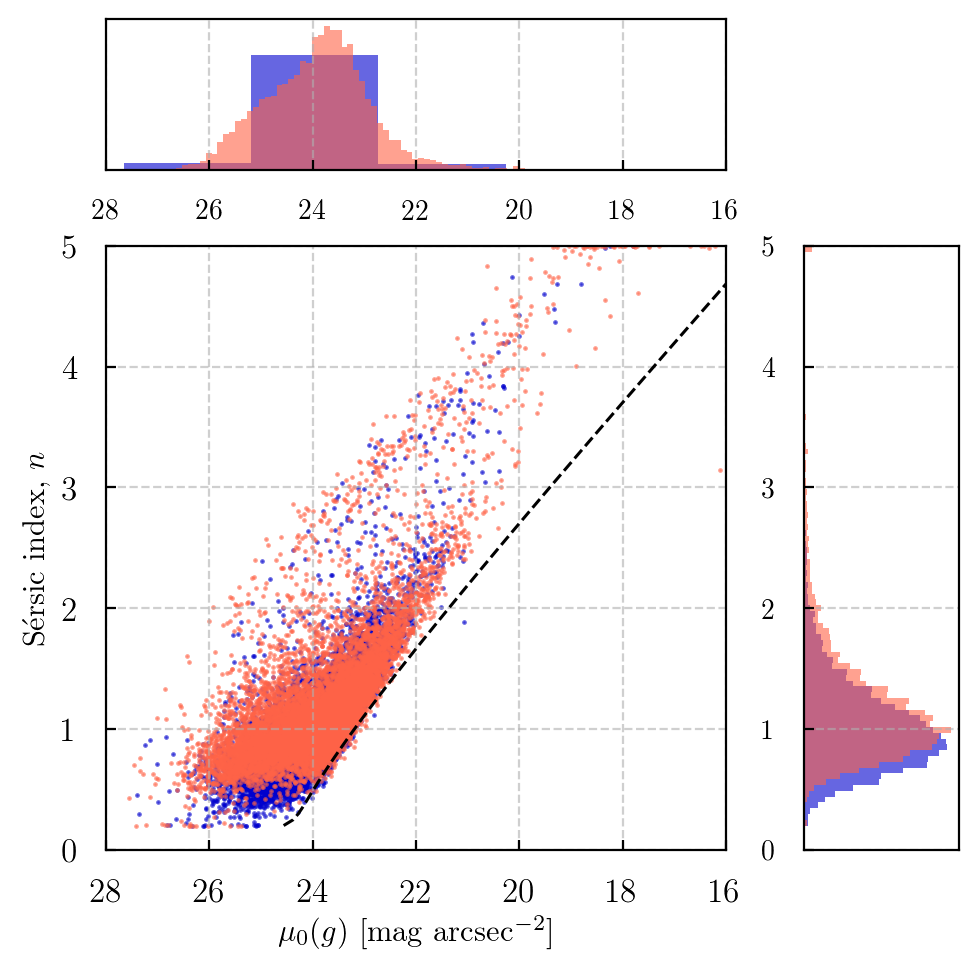

In [18]:
xlabel = '${\mu}_0(g)$ [mag arcsec$^{-2}$]'
ylabel = r'S\'ersic index, $n$'
#ylabel = '$R_{\mbox{\scriptsize{eff}}}(g)$ [arcsec]'
ax,axt,axr = jointPlot(dataset, dims=4,cols=['mediumblue','tomato'],bins=100,kde=False,xlabel=xlabel, ylabel=ylabel, xlow=28,xup=16,ylow=0,yup=5)
#ax.vlines(24.3,1.5,16, color='k', linewidth=1.0,linestyle='--')
#ax.hlines(2.5,28,24, color='k', linewidth=1.0,linestyle='--')

axr.tick_params(axis='both', labelsize=10)
axt.tick_params(axis='both', labelsize=10)
ax.tick_params(axis='both', labelsize=12)
#ax.set_xticks([28,27,26,25,24])

ax.plot(mu_cent_lin,n_lin, ls='--', c='k', linewidth=1.1)

plt.savefig('Cent_surf_sersic.pdf', dpi=100)
plt.show()

In [19]:
print(np.median(n_red))
print(np.median(n_blue))

1.0956634
0.9628534


## Part II: Spatial Distribution plots

In [20]:
import skymap as smap
from skymap import DESSkymap

In [21]:
# Separate in red and blue galaxies
ra_red = RA[col_g_i>med_g_i]
dec_red = DEC[col_g_i>med_g_i]
# ===================================================
ra_blue = RA[col_g_i<med_g_i]
dec_blue = DEC[col_g_i<med_g_i]

//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


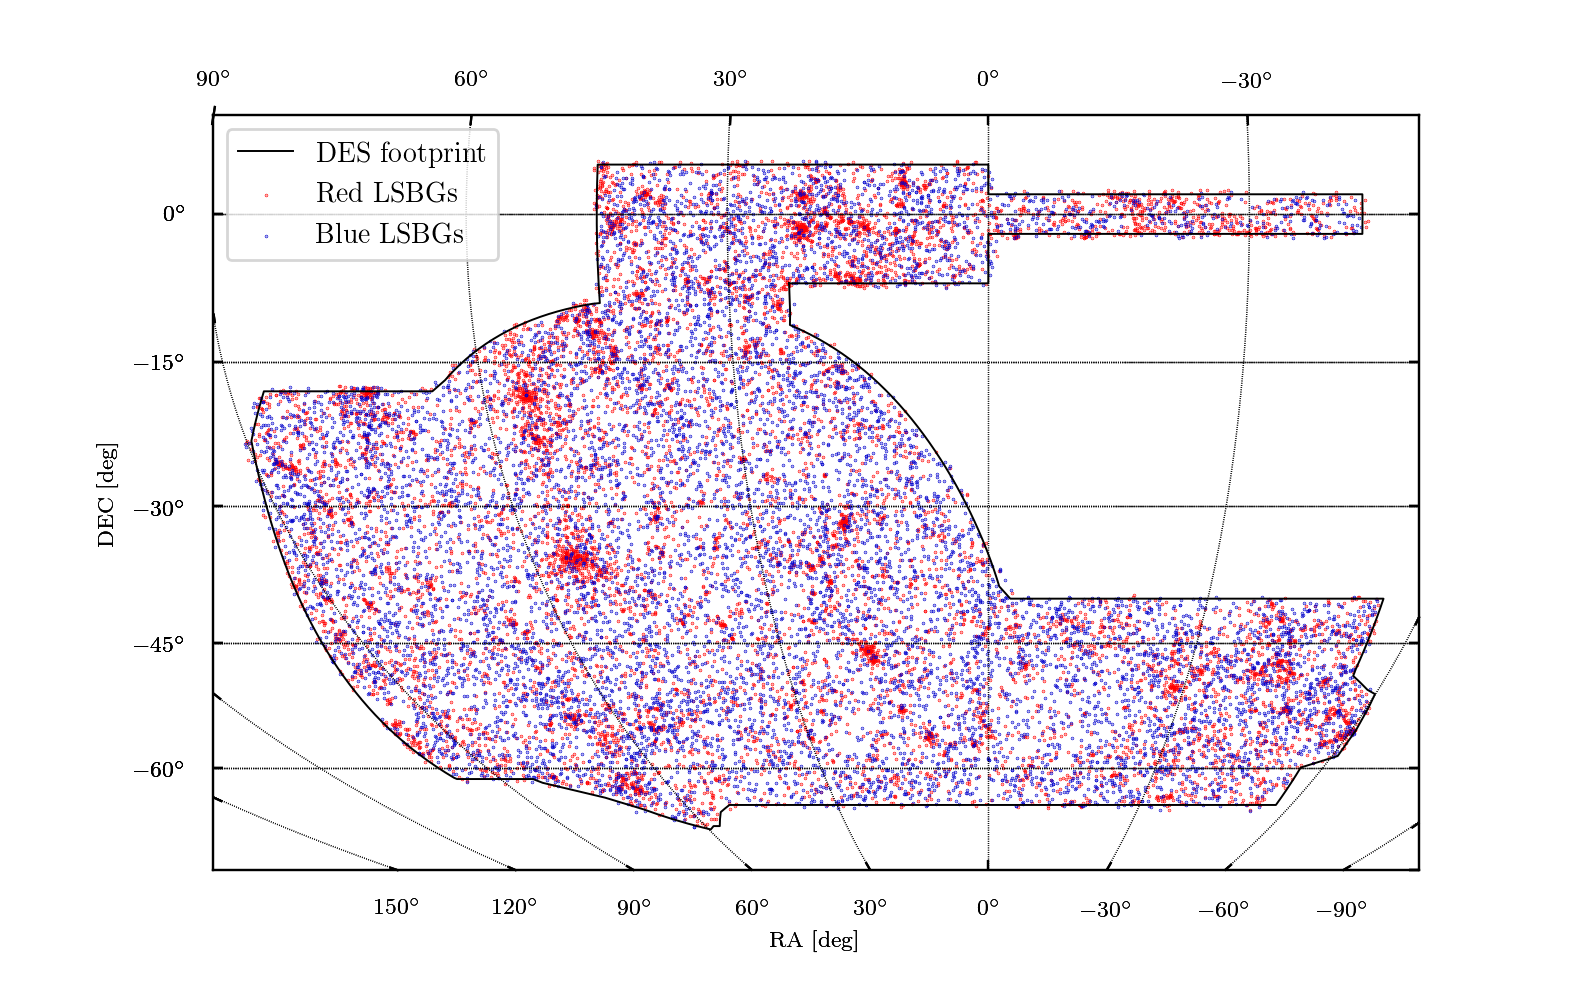

In [22]:
plt.figure(figsize = (8.0,5.0))
smap = DESSkymap()

#smap.scatter(ra, dec, c='r', s=0.05,latlon=True, label="LSBGs")
smap.scatter(ra_red, dec_red, c='r',rasterized=True, s=0.05,latlon=True, label="Red LSBGs")
smap.scatter(ra_blue, dec_blue, c='mediumblue', rasterized=True, s=0.05, latlon=True, label="Blue LSBGs")
smap.draw_des(color='k',linewidth=0.7,label='DES footprint')

plt.xlabel("RA [deg]", fontsize=20)
plt.ylabel("DEC [deg]", fontsize=20)


plt.legend(frameon=True, loc='upper left', fontsize=10)
plt.tight_layout()
plt.savefig('Footprint.pdf',dpi=300,bbox_inches='tight',pad_inches=0)
#plt.savefig('Reds.pdf',dpi=300,bbox_inches='tight',pad_inches=0)
#plt.savefig('Blues.pdf',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()

//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


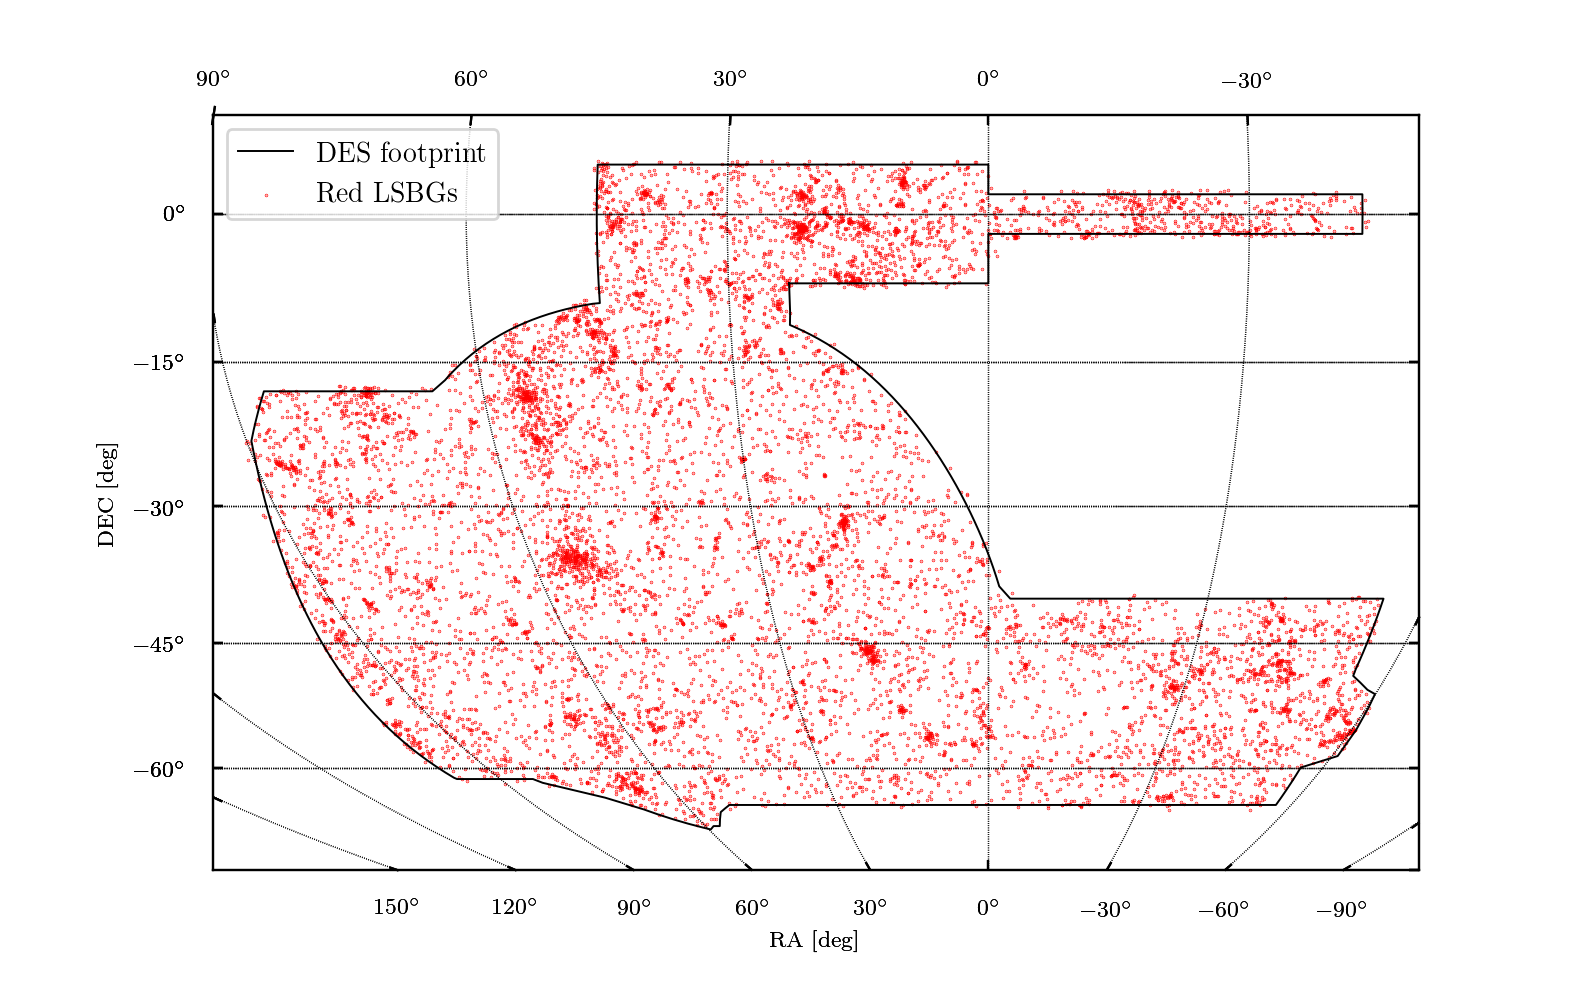

In [23]:
plt.figure(figsize = (8.0,5.0))
smap = DESSkymap()

#smap.scatter(ra, dec, c='r', s=0.05,latlon=True, label="LSBGs")
smap.scatter(ra_red, dec_red, c='r',rasterized=True, s=0.05,latlon=True, label="Red LSBGs")
#smap.scatter(ra_blue, dec_blue, c='mediumblue', rasterized=True, s=0.05, latlon=True, label="Blue LSBGs")
smap.draw_des(color='k',linewidth=0.7,label='DES footprint')

plt.xlabel("RA [deg]", fontsize=20)
plt.ylabel("DEC [deg]", fontsize=20)


plt.legend(frameon=True, loc='upper left', fontsize=10)
plt.tight_layout()
plt.savefig('Reds.pdf',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()

//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:2448: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


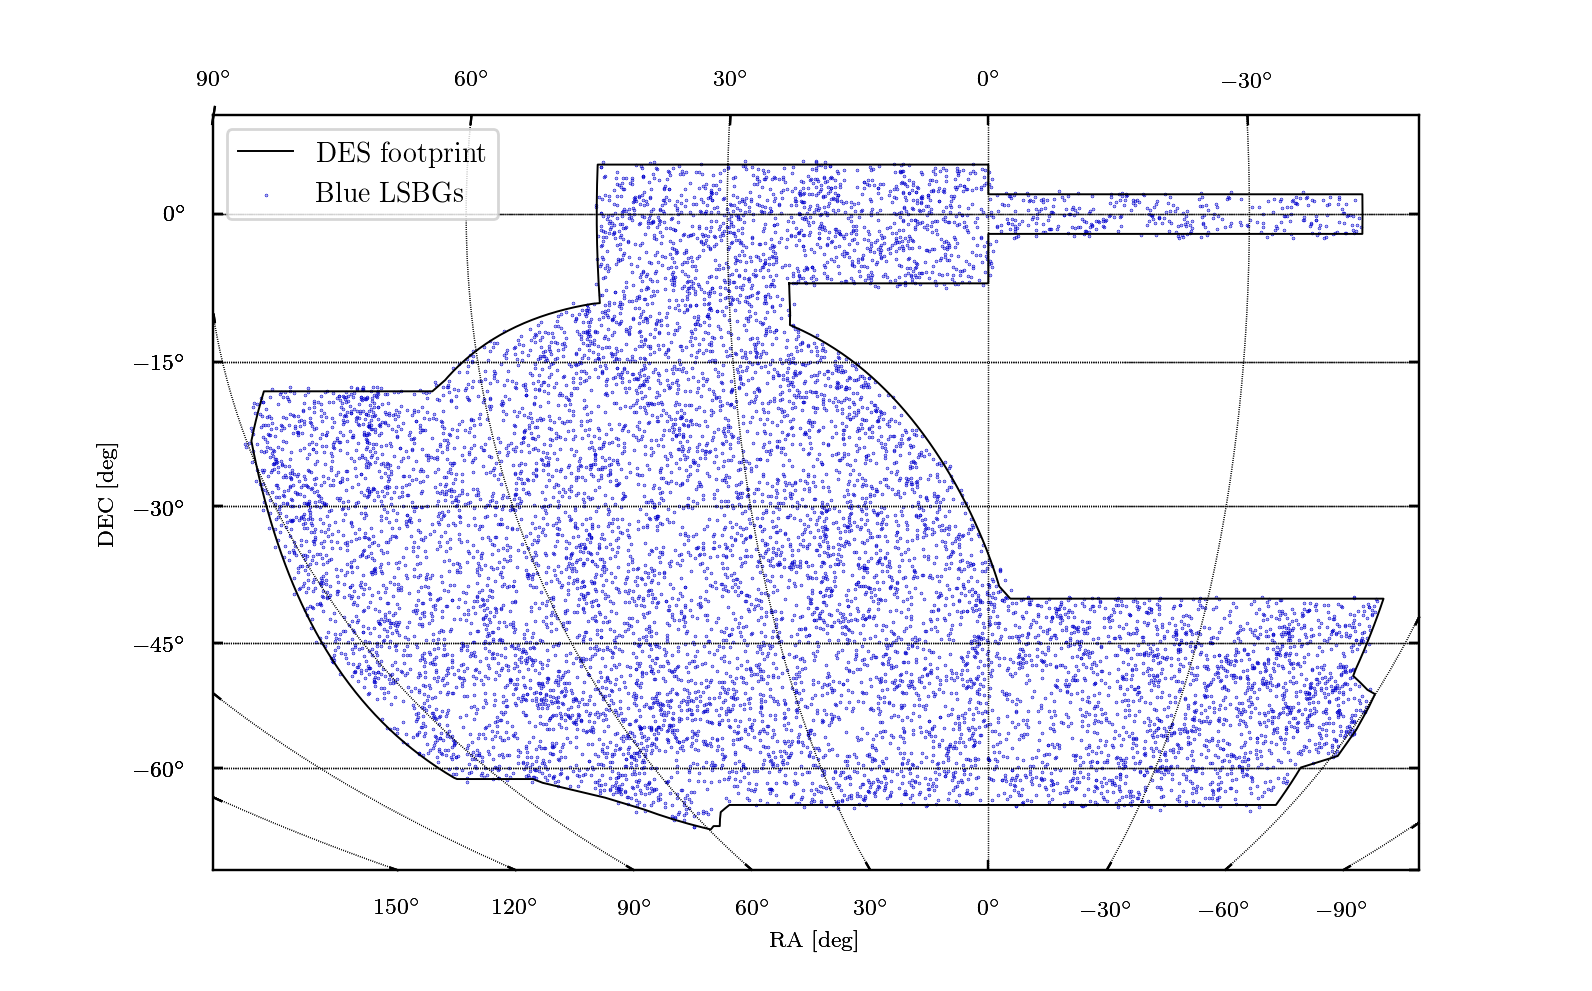

In [24]:
plt.figure(figsize = (8.0,5.0))
smap = DESSkymap()

#smap.scatter(ra, dec, c='r', s=0.05,latlon=True, label="LSBGs")
#smap.scatter(ra_red, dec_red, c='r',rasterized=True, s=0.05,latlon=True, label="Red LSBGs")
smap.scatter(ra_blue, dec_blue, c='mediumblue', rasterized=True, s=0.05, latlon=True, label="Blue LSBGs")
smap.draw_des(color='k',linewidth=0.7,label='DES footprint')

plt.xlabel("RA [deg]", fontsize=20)
plt.ylabel("DEC [deg]", fontsize=20)


plt.legend(frameon=True, loc='upper left', fontsize=10)
plt.tight_layout()
plt.savefig('Blues.pdf',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()

## Part III: Auto-correlation functions of the red/blue sub-samples

In [25]:
# First import some things we are gonna need
import treecorr
import healpy as hp
from astropy import units as u
from astropy.coordinates import SkyCoord

#### Write a function that calculates Jackknife errors, given a data catalog and a random catalog

In [26]:
def Jackknife(ra_dat, dec_dat, ra_rand, dec_rand, N_samples):
    """
    Inputs
    ------------------------------------------
    ra_dat: the ra of the data catalog
    dec_dat: the dec of the data catalog
     
    ra_rand: the ra of the random catalog
    dec_rand: the dac of the random catalog
    
    Outputs
    ------------------------------------------
    Errors in the two-point calculation across different scales
    """
    
    # First of all create array to store the results of the evaluations of 
    # the two point correlation functions
    Xi_vect = np.zeros([N_samples,20]) 
    
    #Create array with length equal to the length of the sample and entries 0,1,...,len(sample)
    len_smpl = len(ra_dat) #length of the sample
    
    A = np.arange(len_smpl)
    #Create array where you randomly redistribute these 
    np.random.shuffle(A)
    
    #randomize the distribution of the ra, dec vectors of the data
    ra_dat_rn = ra_dat[A]
    dec_dat_rn = dec_dat[A]
    
    # Batch size
    batch = int(len_smpl/N_samples)
    
    # =====================================================================
    # =====================================================================
    
    # Let's make a catalog for the randoms
    rand = treecorr.Catalog(ra=ra_rand, dec=dec_rand, ra_units='radians', dec_units='radians')
    rr = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
    rr.process(rand)
    
    # =====================================================================
    # =====================================================================
    #Populate the Xi_vect
    for i in range(N_samples):
        # Points to keep
        init = i*batch #Initial points not to keep
        fin = (i+1)*batch #final points not to keep
        
        # Keep data where you have excluded one batch 
        ra_dat_loc = np.concatenate((ra_dat_rn[:init],ra_dat_rn[fin:]))
        dec_dat_loc = np.concatenate((dec_dat_rn[:init],dec_dat_rn[fin:]))
        
        # Create catalog using the above data 
        cat_dat_loc = treecorr.Catalog(ra=ra_dat_loc, dec=dec_dat_loc, ra_units='deg', dec_units='deg')
        dd_loc = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
        dd_loc.process(cat_dat_loc)
        
        #data - random catalog
        dr_loc = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
        dr_loc.process(cat_dat_loc, rand)
        
        # Calculate 2pt correlation function of the sample
        xi_loc, varxi_loc = dd_loc.calculateXi(rr, dr_loc)
        
        Xi_vect[i,:] = xi_loc
    
        
    # ======================================================================
    # ======================================================================
    # Define vector to store the errors
    Err_vect = np.zeros(20)
    
    for i in range(20):
        
        Xi_i = Xi_vect[:,i]
        mean_Xi_i = np.mean(Xi_i)
        diff_sq = (Xi_i - mean_Xi_i)**2.0
        sig_sq = ((N_samples - 1.0)/N_samples)*np.sum(diff_sq)

        Err_vect[i] = np.sqrt(sig_sq)
    
    return Err_vect
    

#### Create a random catalog

In [27]:
# Open MAP 
# ==========================================
MAP = hp.read_map('y3a2_footprint_grizY_any.fits')

NSIDE = 4096
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [28]:
conv = np.pi/180.
ra_min = -70.0*conv
ra_max = 110.*conv
dec_min = -70.*conv
dec_max = 10.*conv
# ========================
# ========================
rand_ra = np.random.uniform(ra_min, ra_max, 10**7)
rand_sindec = np.random.uniform(np.sin(dec_min), np.sin(dec_max), 10**7)
rand_dec = np.arcsin(rand_sindec)
# ========================

In [29]:
# Get the healpix indices of the randoms
HP_ind_rand = hp.ang2pix(4096, rand_ra/conv, rand_dec/conv, lonlat=True)

In [30]:
# Keep only those with randoms for which the value of the des mask 
# ===============================================
# ===============================================
# Keep local mask
# Get a mask - 1 inside the DES mask
DES_mask = np.zeros(len(MAP))
DES_mask[MAP>0] = 1
LOCAL_mask_rand = DES_mask[HP_ind_rand]

# Keep those with LOCAL_mask = 1
rand_ra_pos = rand_ra[LOCAL_mask_rand==1]
rand_dec_pos = rand_dec[LOCAL_mask_rand==1]

# Calculate the two point correlation function of the mpz sample
# Let's make a catalog for the randoms
rand = treecorr.Catalog(ra=rand_ra_pos, dec=rand_dec_pos, ra_units='radians', dec_units='radians')
rr = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
rr.process(rand)

#### Split LSBGs according to color and make the plot

##### First for the red galaxies

In [31]:
# Create catalog of red galaxies
cat_red = treecorr.Catalog(ra=ra_red, dec=dec_red, ra_units='deg', dec_units='deg')
dd_red = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
dd_red.process(cat_red)
dr_red = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
dr_red.process(cat_red, rand)

In [32]:
# Calculate 2pt correlation function of the red sample
xi_red, varxi_red = dd_red.calculateXi(rr, dr_red)
r_red = np.exp(dd_red.meanlogr)
sig_red = np.sqrt(varxi_red)

In [33]:
# Calculate Jackknife errors
# Calculate red galaxies errors
Errors_red = Jackknife(ra_red, dec_red, rand_ra_pos, rand_dec_pos, 100)

#### For the blue galaxies now

In [34]:
# Create catalog of blue galaxies
cat_blue = treecorr.Catalog(ra=ra_blue, dec=dec_blue, ra_units='deg', dec_units='deg')
dd_blue = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
dd_blue.process(cat_blue)
dr_blue = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
dr_blue.process(cat_blue, rand)

In [35]:
# Calculate 2pt correlation function of the blue sample
xi_blue, varxi_blue = dd_blue.calculateXi(rr, dr_blue)
r_blue = np.exp(dd_blue.meanlogr)
sig_blue = np.sqrt(varxi_blue)

In [36]:
# Calculate Jackknife errors
# Calculate blue galaxies errors
Errors_blue = Jackknife(ra_blue, dec_blue, rand_ra_pos, rand_dec_pos, 100)

#### And for all galaxies

In [37]:
# Create catalog
cat_LSBG = treecorr.Catalog(ra=RA, dec=DEC, ra_units='deg', dec_units='deg')

dd_LSBG = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
dd_LSBG.process(cat_LSBG)
# ===========================================================
# ===========================================================
dr_LSBG = treecorr.NNCorrelation(min_sep=0.01, max_sep=20, bin_size=0.4, sep_units='degrees')
dr_LSBG.process(cat_LSBG, rand)
# ===========================================================
# Calculate 2pt correlation function of the total sample
xi_LSBG, varxi_LSBG = dd_LSBG.calculateXi(rr, dr_LSBG)
r_LSBG = np.exp(dd_LSBG.meanlogr)


In [38]:
# Calculate Jackknife errors
# Calculate LSBG errors
Errors_LSBG = Jackknife(RA, DEC, rand_ra_pos, rand_dec_pos, 100)

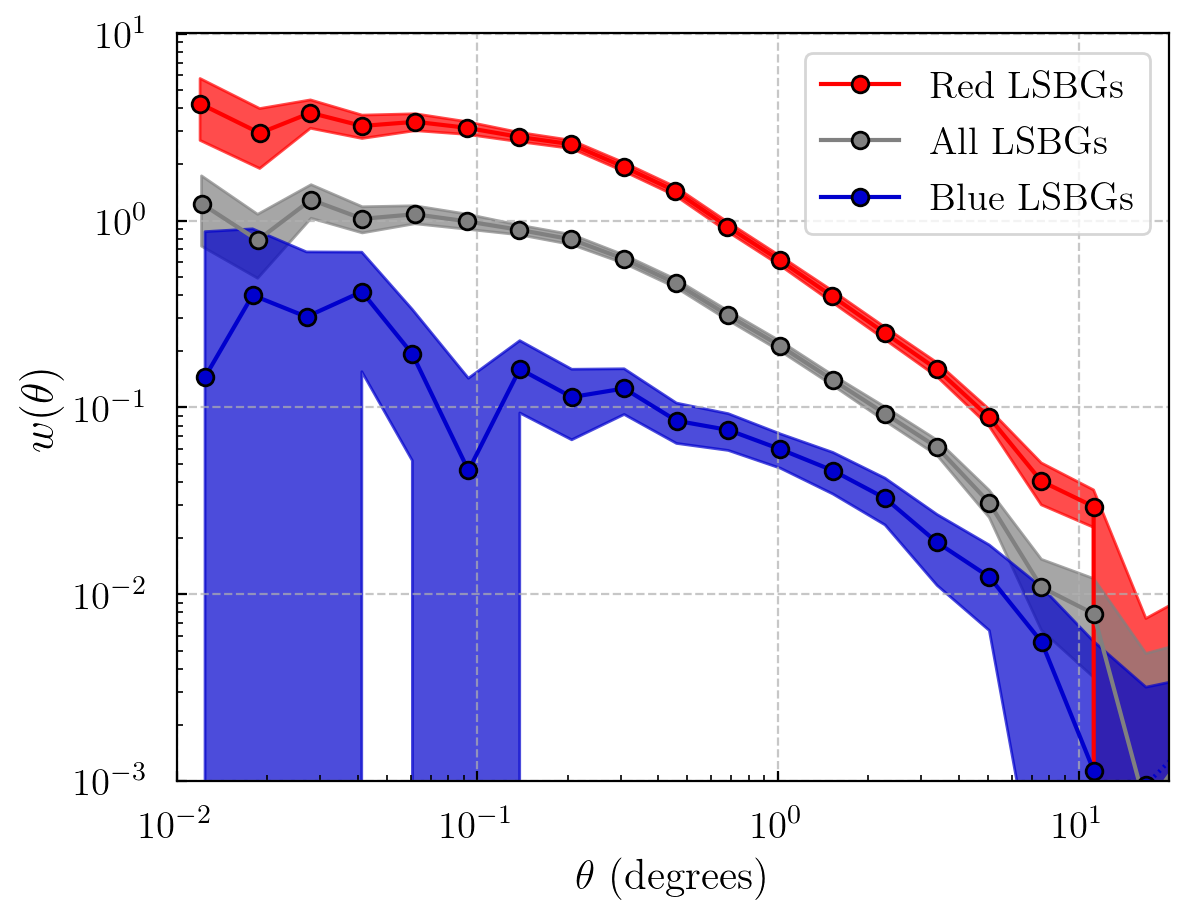

In [39]:
plt.figure(figsize = (6.,4.65))

# red galaxies
plt.plot(r_red, xi_red, color='r',marker='o', markeredgecolor='k', label='Red LSBGs')
plt.plot(r_red, -xi_red, color='r',marker='o', markeredgecolor='k', ls=':')
plt.fill_between(r_red, xi_red-Errors_red, xi_red+Errors_red, color='r', alpha=0.7)

# All galaxies
plt.plot(r_LSBG, xi_LSBG, color='gray',marker='o', markeredgecolor='k', label='All LSBGs')
plt.plot(r_LSBG, -xi_LSBG, color='gray',marker='o', markeredgecolor='k', ls=':')
plt.fill_between(r_LSBG, xi_LSBG-Errors_LSBG, xi_LSBG+Errors_LSBG, color='gray', alpha=0.7)


# blue galaxies
plt.plot(r_blue, xi_blue, color='mediumblue',marker='o', markeredgecolor='k', label='Blue LSBGs')
plt.plot(r_blue, -xi_blue, color='mediumblue',marker='o', markeredgecolor='k', ls=':')
plt.fill_between(r_blue, xi_blue-Errors_blue, xi_blue+Errors_blue, color='mediumblue', alpha=0.7)



# Low-z galaxies
#plt.plot(r, xi_low, color='g',marker='o', markeredgecolor='k', label=r'2MPZ low-$z$')
#plt.plot(r, -xi_low, color='g',marker='o', markeredgecolor='k', ls=':')
#plt.fill_between(r, xi_low-Errors_lowz, xi_low+Errors_lowz, color='g', alpha=0.7)

plt.grid(ls='--',alpha=0.7)
plt.xscale('log')
plt.yscale('log', nonposy='clip')
plt.xlabel(r'$\theta$ (degrees)', fontsize=15)



plt.ylabel(r'$w(\theta)$', fontsize=16)
plt.legend(frameon=True, loc='upper right', fontsize=14)
plt.xlim([0.01,20]);plt.ylim(1.0e-3)
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
plt.savefig('two_point_color_blue.pdf', dpi=300)
plt.show()

## Part IV: Size - Luminosity relation

In this part, I present the size-luminosity relation for the LSB Galaxy sample.

I select all LSB galaxies that lie within 1 Mpc (physical scale) from the center of each association.

Define coordinates and redshifts/distances to the 9 most prominent peaks

In [40]:
# Right Ascension of the peaks
peaks_RA = [21.4200,55.04750,18.475833,9.888208,17.501667,54.616250,21.374583,16.929944,45.977000]

# Declination of the peaks
peaks_DEC = [-1.407222,-18.5875,-31.751944,3.138528,-45.922778,-35.448333,1.762778,-46.916526,-11.991806]

# Distance of the peaks in Mpc
peaks_dists = [75.07,23.41,84.80,62.61,106.61,18.97,73.32,102.03,57.03]

In [41]:
rad_to_deg = 180.0/np.pi

rad_1 = np.zeros(87)
mag_1 = np.zeros(87)
dist_1 = np.zeros(87)
# ==========================
# ==========================
rad_2 = np.zeros(210)
mag_2 = np.zeros(210)
dist_2 = np.zeros(210)
# ==========================
# ==========================
rad_3 = np.zeros(56)
mag_3 = np.zeros(56)
dist_3 = np.zeros(56)
# ==========================
# ==========================
rad_4 = np.zeros(54)
mag_4 = np.zeros(54)
dist_4 = np.zeros(54)
# ==========================
# ==========================
rad_5 = np.zeros(41)
mag_5 = np.zeros(41)
dist_5 = np.zeros(41)
# ==========================
# ==========================
rad_6 = np.zeros(352)
mag_6 = np.zeros(352)
dist_6 = np.zeros(352)
# ==========================
# ==========================
rad_7 = np.zeros(50)
mag_7 = np.zeros(50)
dist_7 = np.zeros(50)
# ==========================
# ==========================
rad_8 = np.zeros(31)
mag_8 = np.zeros(31)
dist_8 = np.zeros(31)
# ==========================
# ==========================
rad_9 = np.zeros(56)
mag_9 = np.zeros(56)
dist_9 = np.zeros(56)

for i in range(9): # In the range of the peaks
    
    ra_pk = peaks_RA[i] # RA of the i-th peak
    dec_pk = peaks_DEC[i] # DEC of the i-th peak
    dist_pk = peaks_dists[i] # Distance of the i-th peak in Mpc
    
    
    # Create a box to select LSB galaxies
    ra_up = ra_pk+4.0
    ra_low = ra_pk-4.0
    dec_up = dec_pk+4.0
    dec_low = dec_pk-4.0
    
    box_LSB = (RA>ra_low)&(RA<ra_up)&(DEC>dec_low)&(DEC<dec_up)
    # Keep the LSB galaxies inside the box
    ra_lsb_pk = RA[box_LSB] # ra
    dec_lsb_pk = DEC[box_LSB] # dec
    R_eff_pk = R_eff[box_LSB] # Effective radius
    mag_g_pk = mag_g[box_LSB] # magnitude in the g band
    # =====================================================================
    # =====================================================================
    
    # Calculate now the angular extend of 1Mpc at the distance of the i-th peak
    ang_1mpc = rad_to_deg*(1.0/dist_pk)
    
    # Create object for the position of the peak
    C_pk = SkyCoord(ra=ra_pk*u.degree, dec=dec_pk*u.degree, frame='icrs')
    # Create object for the lsb galaxies
    C_lsb_pk = SkyCoord(ra=ra_lsb_pk*u.degree, dec=dec_lsb_pk*u.degree, frame='icrs')
    # =====================================================
    # Calculate angular separations
    sep_lsb_pk = C_lsb_pk.separation(C_pk).deg # Separation between peak and lsbs
    
    
    # Keep Effective radii and magnitudes with a separation less than 1.0 Mpc
    R_eff_1mpc = R_eff_pk[sep_lsb_pk<ang_1mpc]
    mag_g_1mpc = mag_g_pk[sep_lsb_pk<ang_1mpc]
    dist_1mpc = sep_lsb_pk[sep_lsb_pk<ang_1mpc] 
    
    # Now estimate the physical radius (in pc) and the absolute magnitude 
    # of the LSB galaxies around the peak
    
    deg_to_rad = 0.0174533
    radius = R_eff_1mpc*dist_pk*(4.848)
    Abs_mag = mag_g_1mpc +5.0 - 5.0*np.log10(dist_pk*1.0e6)
    phys_dist = dist_1mpc*dist_pk*(1.0e6)*deg_to_rad
    
    if (i==0):
        rad_1[:] = radius
        mag_1[:] = Abs_mag
        dist_1[:] = phys_dist
    elif (i==1):
        rad_2[:] = radius
        mag_2[:] = Abs_mag
        dist_2[:] = phys_dist
    elif (i==2):
        rad_3[:] = radius
        mag_3[:] = Abs_mag
        dist_3[:] = phys_dist
    elif (i==3):
        rad_4[:] = radius
        mag_4[:] = Abs_mag
        dist_4[:] = phys_dist
    elif (i==4):
        rad_5[:] = radius
        mag_5[:] = Abs_mag
        dist_5[:] = phys_dist
    elif (i==5):
        rad_6[:] = radius
        mag_6[:] = Abs_mag
        dist_6[:] = phys_dist
    elif (i==6):
        rad_7[:] = radius
        mag_7[:] = Abs_mag
        dist_7[:] = phys_dist
    elif (i==7):
        rad_8[:] = radius
        mag_8[:] = Abs_mag
        dist_8[:] = phys_dist
    elif (i==8):
        rad_9[:] = radius
        mag_9[:] = Abs_mag
        dist_9[:] = phys_dist

If we want a relationship between absolute magnitude, surface brightness and effective radius (in pc), this is given by: 

\begin{equation}
R_p = (4.848\times 10^{-6}) \times 10^{\frac{5+\langle \mu \rangle - M -2.5\log 2\pi}{5}}
\end{equation}

In [42]:
M_mag = np.linspace(-18,8,500)

def R_arr(mu_mn):
    
    alpha = (5.0+mu_mn-M_mag-2.5*np.log10(2.0*np.pi))/5.0
    
    R_a = (4.848*1.0e-6)*(10.0**alpha)
    return R_a

R_arr_24 = R_arr(24.)
R_arr_25 = R_arr(25.)
R_arr_26 = R_arr(26.)
R_arr_27 = R_arr(27.)
R_arr_28 = R_arr(28.)

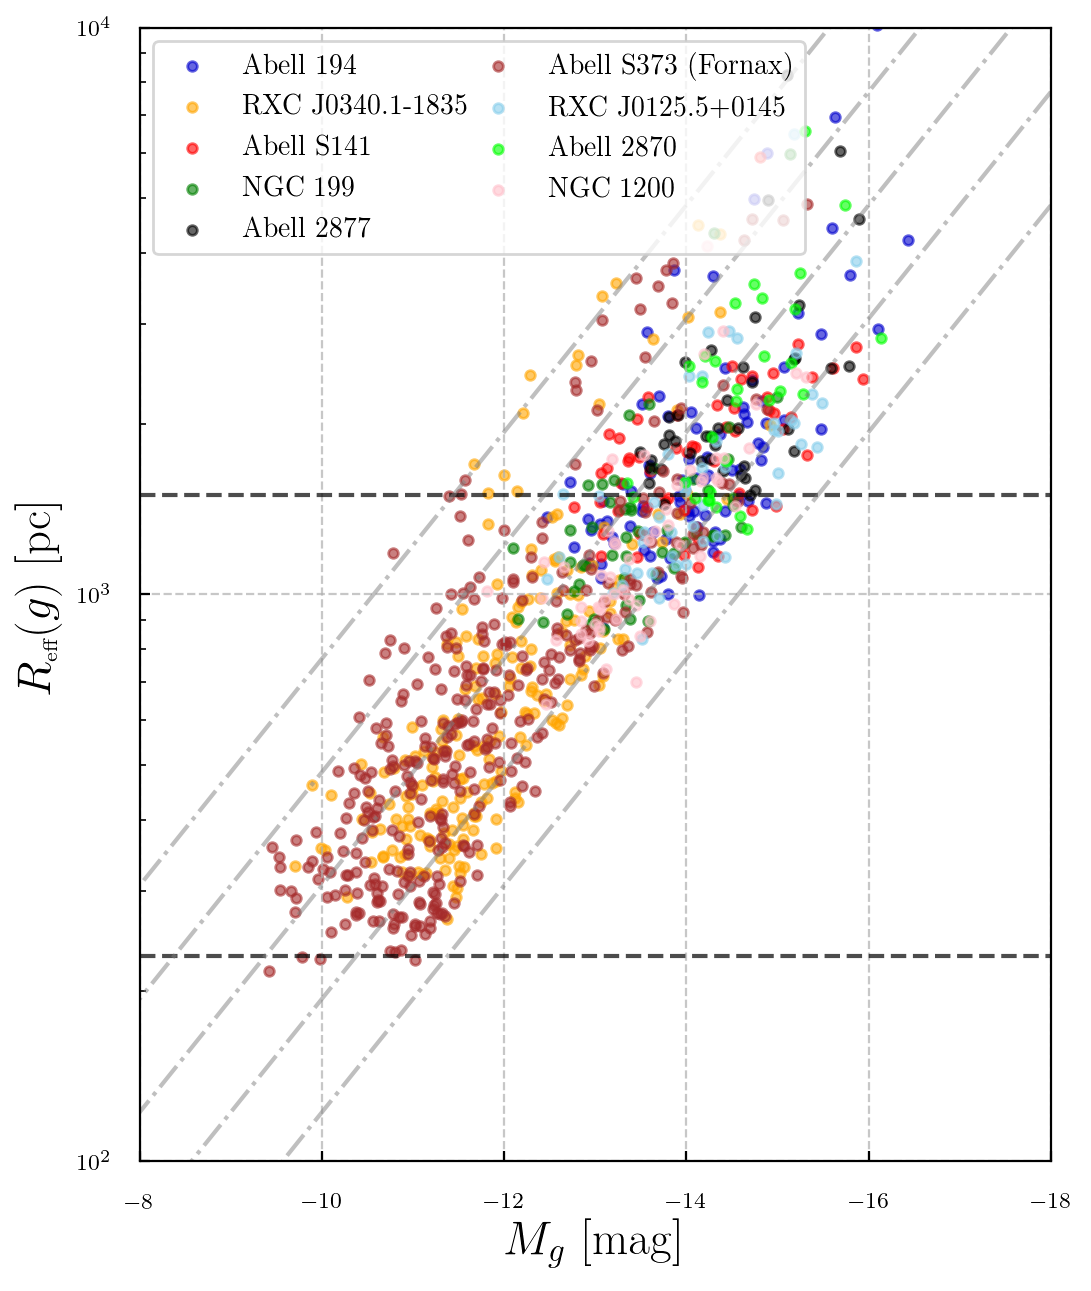

In [43]:
x_s = np.linspace(-8,-18,200)
y_s = 1839.33*np.ones(200)
y_s = 1500.0*np.ones(200)
y_s_2 = 229.91*np.ones(200)

plt.figure(figsize = (5.5,6.5))

plt.scatter(mag_1,rad_1, s=12.0, color='mediumblue', marker='o', alpha=0.6, label='Abell 194')
plt.scatter(mag_2,rad_2, s=12.0, color='orange',marker='o', alpha=0.6,label='RXC J0340.1-1835')
plt.scatter(mag_3,rad_3, s=12.0, color='red', marker='o', alpha=0.6,label='Abell S141')
plt.scatter(mag_4,rad_4, s=12.0, color='green', marker='o', alpha=0.6, label='NGC 199')
plt.scatter(mag_5,rad_5, s=12.0, color='black', marker='o', alpha=0.6,  label='Abell 2877')
plt.scatter(mag_6,rad_6, s=12.0, color='brown', marker='o', alpha=0.6,  label='Abell S373 (Fornax)')
plt.scatter(mag_7,rad_7, s=12.0, color='skyblue', marker='o', alpha=0.6, label='RXC J0125.5+0145')
plt.scatter(mag_8,rad_8, s=12.0, color='lime', marker='o', alpha=0.6, label='Abell 2870')
plt.scatter(mag_9,rad_9, s=12.0, color='pink', marker='o', alpha=0.6, label ='NGC 1200')

plt.plot(x_s,y_s, ls='--', color='k',alpha=0.7)
plt.plot(x_s,y_s_2, ls='--', color='k',alpha=0.7)
plt.plot(M_mag, R_arr_24, ls='-.',color='gray', alpha=0.5)
plt.plot(M_mag, R_arr_25, ls='-.',color='gray', alpha=0.5)
plt.plot(M_mag, R_arr_26, ls='-.',color='gray', alpha=0.5)
plt.plot(M_mag, R_arr_27, ls='-.',color='gray', alpha=0.5)
plt.plot(M_mag, R_arr_28, ls='-.',color='gray', alpha=0.5)

plt.yscale('log')
plt.ylim(1e2,1e4)
plt.xlim(-8,-18)
plt.grid(ls='--',alpha=0.7)


plt.xlabel('$M_g$ [mag]', fontsize=17)
plt.ylabel('$R_{\mbox{\scriptsize{eff}}}(g)$ [pc]', fontsize=17)

plt.legend(frameon=True, loc='upper left', fontsize=10, ncol=2,columnspacing=0.1)

plt.tight_layout()
plt.savefig('Size_Lumin.pdf')
plt.show()

In [44]:
print(len(rad_1[rad_1>1500]))
print(len(rad_2[rad_2>1500]))
print(len(rad_3[rad_3>1500]))
print(len(rad_4[rad_4>1500]))
print(len(rad_5[rad_5>1500]))
print(len(rad_6[rad_6>1500]))
print(len(rad_7[rad_7>1500]))
print(len(rad_8[rad_8>1500]))
print(len(rad_9[rad_9>1500]))

46
19
38
14
39
29
26
24
17


In [45]:
print(41+7+35+14+38+13+24+23+14)

209


In [46]:
print(len(rad_1)+len(rad_2)+len(rad_3)+len(rad_4)+len(rad_5)+len(rad_6)+len(rad_7)+len(rad_8)+len(rad_9))

937


In [47]:
print(209./937.)

0.223052294557


In [48]:
print(len(rad_1[rad_1>1500])/np.float(len(rad_1)))
print(len(rad_2[rad_2>1500])/np.float(len(rad_2)))
print(len(rad_3[rad_3>1500])/np.float(len(rad_3)))
print(len(rad_4[rad_4>1500])/np.float(len(rad_4)))
print(len(rad_5[rad_5>1500])/np.float(len(rad_5)))
print(len(rad_6[rad_6>1500])/np.float(len(rad_6)))
print(len(rad_7[rad_7>1500])/np.float(len(rad_7)))
print(len(rad_8[rad_8>1500])/np.float(len(rad_8)))
print(len(rad_9[rad_9>1500])/np.float(len(rad_9)))

0.528735632184
0.0904761904762
0.678571428571
0.259259259259
0.951219512195
0.0823863636364
0.52
0.774193548387
0.303571428571


### Distance - Size plot

In this part I will make a (scatter) plot of the relationship between the LSBG size and distance from the center of the association.

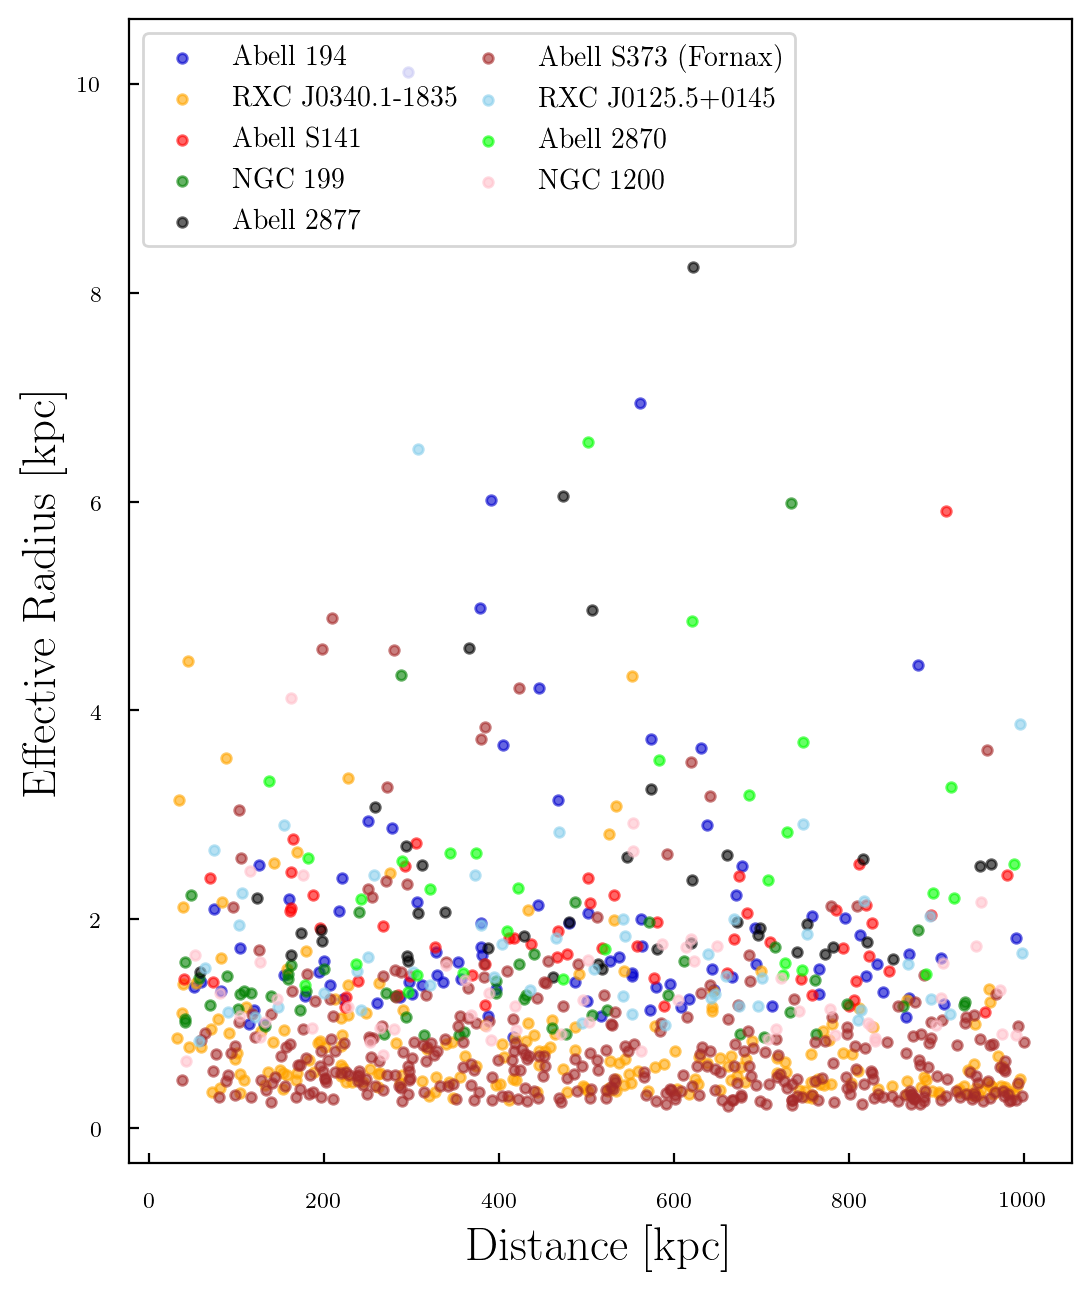

In [49]:
plt.figure(figsize = (5.5,6.5))

plt.scatter(dist_1/1000.0, rad_1/1000.0,s=12.0, color='mediumblue', marker='o', alpha=0.6, label='Abell 194')
plt.scatter(dist_2/1000.0,rad_2/1000.0, s=12.0, color='orange',marker='o', alpha=0.6,label='RXC J0340.1-1835')
plt.scatter(dist_3/1000.0,rad_3/1000.0, s=12.0, color='red', marker='o', alpha=0.6,label='Abell S141')
plt.scatter(dist_4/1000.0,rad_4/1000.0, s=12.0, color='green', marker='o', alpha=0.6, label='NGC 199')
plt.scatter(dist_5/1000.0,rad_5/1000.0, s=12.0, color='black', marker='o', alpha=0.6,  label='Abell 2877')
plt.scatter(dist_6/1000.0,rad_6/1000.0, s=12.0, color='brown', marker='o', alpha=0.6,  label='Abell S373 (Fornax)')
plt.scatter(dist_7/1000.0,rad_7/1000.0, s=12.0, color='skyblue', marker='o', alpha=0.6, label='RXC J0125.5+0145')
plt.scatter(dist_8/1000.0,rad_8/1000.0, s=12.0, color='lime', marker='o', alpha=0.6, label='Abell 2870')
plt.scatter(dist_9/1000.0,rad_9/1000.0, s=12.0, color='pink', marker='o', alpha=0.6, label ='NGC 1200')

#plt.xscale('log');plt.yscale('log')

plt.legend(frameon=True, loc='upper left', fontsize=10, ncol=2,columnspacing=0.1)


plt.xlabel('Distance [kpc]', fontsize=17)
plt.ylabel('Effective Radius [kpc]', fontsize=17)

plt.tight_layout()
plt.savefig('Distance_size.pdf')
plt.show()

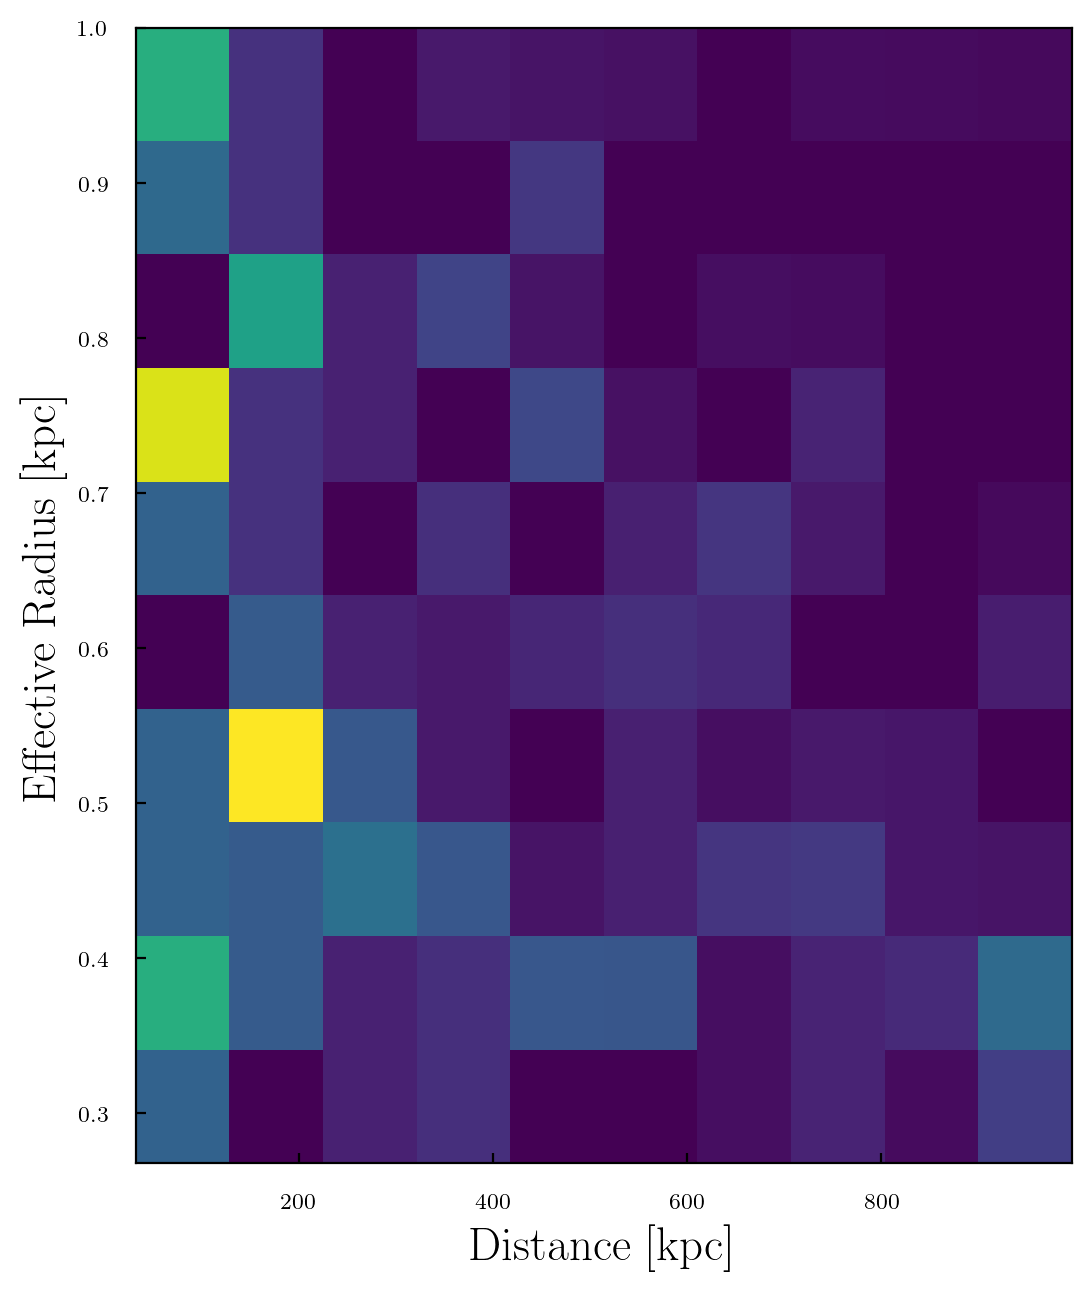

In [50]:
dist_lt = dist_2[rad_2<1000]/1000.0

h, xed, yed = np.histogram2d(dist_lt,rad_2[rad_2<1000]/1000.0)

areas = np.zeros(10)
weig = np.zeros(len(dist_lt))
for i in range(10):
    areas[i] = np.pi*(xed[i+1]**2.0-xed[i]**2.0)
    
    
for i in range(len(dist_lt)):
    
    dist_loc = dist_lt[i]
    
    j = 9
    for k in range(10):
        if ((dist_loc>xed[k])and(dist_loc<xed[k+1])):
            j = k
            
    #print(j)        
    weig[i] = 1.0/areas[j] 

plt.figure(figsize = (5.5,6.5))

plt.hist2d(dist_lt,rad_2[rad_2<1000]/1000.0, bins=10,weights=weig)

plt.xlabel('Distance [kpc]', fontsize=17)
plt.ylabel('Effective Radius [kpc]', fontsize=17)

plt.tight_layout()
plt.savefig('Distance_size_RXC.pdf')
plt.show()

In [51]:
print(dist_lt[-1])

717.6753520866396


In [52]:
print(np.max(dist_6[rad_6<1000]/1000))

999.8134683841571


### Write code that converts to csv file

In [53]:
coadd_id = np.loadtxt("LSBGs_properties_tot.dat", usecols=(0), unpack=3).astype(int)
ra, dec = np.loadtxt("LSBGs_properties_tot.dat", usecols=(1,2), unpack=3)
A_image, B_image = np.loadtxt("LSBGs_properties_tot.dat", usecols=(3,4), unpack=3)
mag_auto_g = np.loadtxt("LSBGs_properties_tot.dat", usecols=(5), unpack=3)
flux_radius_g = np.loadtxt("LSBGs_properties_tot.dat", usecols=(6), unpack=3)
mu_max_g = np.loadtxt("LSBGs_properties_tot.dat", usecols=(7), unpack=3)
mu_max_model_g = np.loadtxt("LSBGs_properties_tot.dat", usecols=(8), unpack=3)
mu_eff_model_g = np.loadtxt("LSBGs_properties_tot.dat", usecols=(9), unpack=3)
mu_mean_model_g = np.loadtxt("LSBGs_properties_tot.dat", usecols=(10), unpack=3)
mag_auto_r = np.loadtxt("LSBGs_properties_tot.dat", usecols=(11), unpack=3)
flux_radius_r = np.loadtxt("LSBGs_properties_tot.dat", usecols=(12), unpack=3)
mu_max_r = np.loadtxt("LSBGs_properties_tot.dat", usecols=(13), unpack=3)
mu_max_model_r = np.loadtxt("LSBGs_properties_tot.dat", usecols=(14), unpack=3)
mu_eff_model_r = np.loadtxt("LSBGs_properties_tot.dat", usecols=(15), unpack=3)
mu_mean_model_r = np.loadtxt("LSBGs_properties_tot.dat", usecols=(16), unpack=3)
mag_auto_i = np.loadtxt("LSBGs_properties_tot.dat", usecols=(17), unpack=3)
flux_radius_i = np.loadtxt("LSBGs_properties_tot.dat", usecols=(18), unpack=3)
mu_max_i = np.loadtxt("LSBGs_properties_tot.dat", usecols=(19), unpack=3)
mu_max_model_i = np.loadtxt("LSBGs_properties_tot.dat", usecols=(20), unpack=3)
mu_eff_model_i = np.loadtxt("LSBGs_properties_tot.dat", usecols=(21), unpack=3)
mu_mean_model_i = np.loadtxt("LSBGs_properties_tot.dat", usecols=(22), unpack=3)
bpz_zmean_mof = np.loadtxt("LSBGs_properties_tot.dat", usecols=(23), unpack=3)
bpz_zmc_mof = np.loadtxt("LSBGs_properties_tot.dat", usecols=(24), unpack=3)
dnf_zmean_mof = np.loadtxt("LSBGs_properties_tot.dat", usecols=(25), unpack=3)
dnf_zmc_mof = np.loadtxt("LSBGs_properties_tot.dat", usecols=(26), unpack=3)


In [54]:
import pandas as pd
from collections import OrderedDict

LSBG_sextractor = pd.DataFrame(OrderedDict((('COADD_ID', coadd_id), ('RA', ra), ('DEC',dec),
                                           ('A_IMAGE', A_image), ('B_IMAGE', B_image),
                                           ('MAG_AUTO_G', mag_auto_g), ('FLUX_RADIUS_G', flux_radius_g),
                                           ('MU_MAX_G', mu_max_g), ('MU_MAX_MODEL_G',mu_max_model_g),
                                           ('MU_EFF_MODEL_G',mu_eff_model_g), ('MU_MEAN_MODEL_G',mu_mean_model_g),
                                           ('MAG_AUTO_R', mag_auto_r), ('FLUX_RADIUS_R', flux_radius_r),
                                           ('MU_MAX_R', mu_max_r), ('MU_MAX_MODEL_R',mu_max_model_r),
                                           ('MU_EFF_MODEL_R',mu_eff_model_r), ('MU_MEAN_MODEL_R',mu_mean_model_r),
                                           ('MAG_AUTO_I', mag_auto_i), ('FLUX_RADIUS_I', flux_radius_i),
                                           ('MU_MAX_I', mu_max_i), ('MU_MAX_MODEL_I',mu_max_model_i),
                                           ('MU_EFF_MODEL_I',mu_eff_model_i), ('MU_MEAN_MODEL_I',mu_mean_model_i),
                                           ('BPZ_ZMEAN_MOF',bpz_zmean_mof),('BPZ_ZMC_MOF',bpz_zmc_mof),
                                           ('DNF_ZMEAN_MOF',dnf_zmean_mof),('DNF_ZMC_MOF',dnf_zmc_mof))))

LSBG_sextractor.head()

,COADD_ID,RA,DEC,A_IMAGE,B_IMAGE,MAG_AUTO_G,FLUX_RADIUS_G,MU_MAX_G,MU_MAX_MODEL_G,MU_EFF_MODEL_G,...,MAG_AUTO_I,FLUX_RADIUS_I,MU_MAX_I,MU_MAX_MODEL_I,MU_EFF_MODEL_I,MU_MEAN_MODEL_I,BPZ_ZMEAN_MOF,BPZ_ZMC_MOF,DNF_ZMEAN_MOF,DNF_ZMC_MOF
0,175839409,359.793893,1.554095,12.605022,8.997258,18.874056,5.164035,23.428265,23.494036,25.293804,...,18.464495,4.943278,22.811098,22.975512,24.777678,24.079296,0.036037,0.036037,0.040200,0.051145
1,149153966,7.611159,1.597898,5.344226,4.769653,20.480474,3.642339,24.062735,24.051514,25.851429,...,19.975348,4.027261,23.405300,23.728117,25.532032,24.834091,0.898988,0.898988,0.065982,0.197034
2,295070050,17.320783,1.882873,6.936638,5.123708,20.284721,2.823863,23.781620,24.210632,26.012514,...,19.940479,2.745566,23.187941,23.825127,25.630735,24.931305,0.214362,0.214362,0.558760,0.416937
3,264754887,25.659663,0.664841,4.116403,1.926127,21.846134,2.573879,24.465137,24.472900,26.247099,...,21.526882,2.633096,23.724840,24.046640,25.811104,25.106400,0.231092,0.231092,0.439345,0.325477
4,248990318,25.512297,2.085334,7.817362,5.379212,19.988955,3.246297,23.345110,23.294128,25.091532,...,19.176245,3.144552,22.574450,22.429962,24.229721,23.530426,0.179198,0.179198,0.205850,0.220846


In [55]:
LSBG_sextractor.to_csv('LSBG_SExtractor_catalog.csv')

(array([  45.,  588., 2469., 3001., 1992., 1052.,  572.,  323.,  159.,
         110.,   87.,   60.,   52.,   36.,   39.,   26.,   21.,   21.,
          10.,   48.]),
 array([0.20000115, 0.44000104, 0.68000096, 0.92000085, 1.1600007 ,
        1.4000006 , 1.6400005 , 1.8800005 , 2.1200004 , 2.3600001 ,
        2.6000001 , 2.84      , 3.08      , 3.3199997 , 3.5599997 ,
        3.7999995 , 4.0399995 , 4.2799993 , 4.519999  , 4.7599993 ,
        4.999999  ], dtype=float32),
 <a list of 20 Patch objects>)

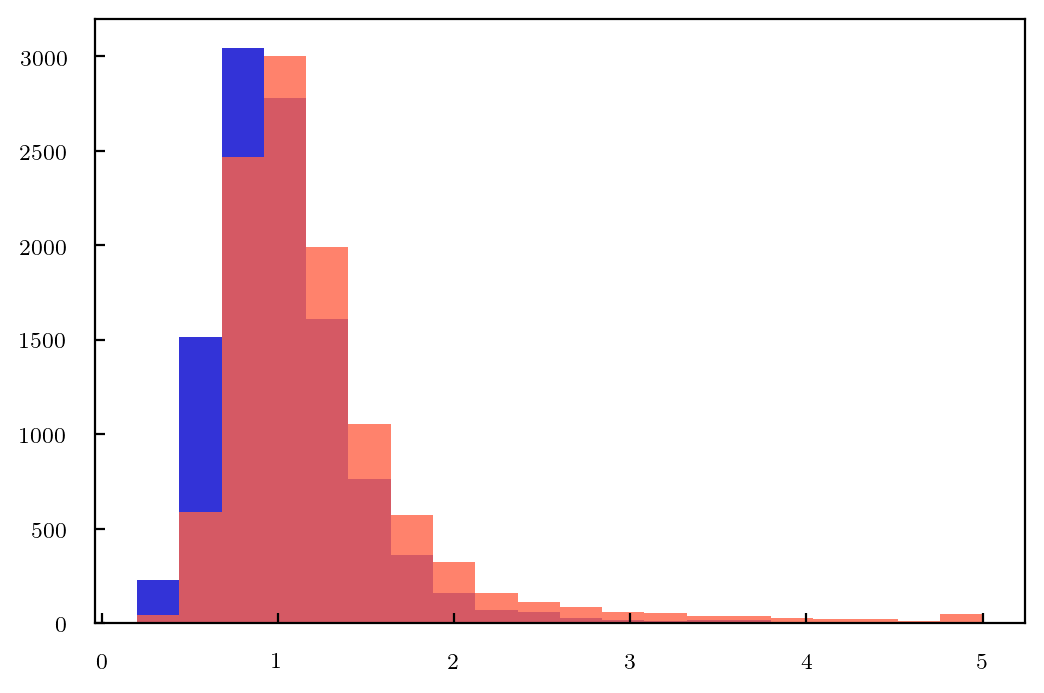

In [56]:
plt.hist(n_ser[col_g_i<med_g_i],color='mediumblue', alpha=0.8,bins=20)
plt.hist(n_ser[col_g_i>med_g_i],color='tomato', alpha=0.8,bins=20)

In [57]:
print(np.median(n_ser[col_g_i<med_g_i]))
print(np.median(n_ser[col_g_i>med_g_i]))
print(np.median(n_ser))

0.9628534
1.0956634
1.0288657


In [58]:
import scipy as sp
# Distances of clusters and groups
dists = [44.1,260.0, 244.0,135.65,120.23,187.3,195.1,82.7,174.2,221.0,202.1,40.28,39.8,74.77,25.59,68.93,102.0,106.41,
        125.4,189.45,134.15,195.4,159.2,202.95,237.21,82.74,354.11,92.71,86.45,24.38,128.5,18.97,84.80,168.20,96.2,159.35,190.62,
        175.6,60.31,206.5,61.43,314.97,156.2,23.41,147.75,137.85,127.18,104.68,34.9,36.01,134.1,139.1,35.3,21.87,55.33,70.59,55.6,61.56,69.14,69.27,76.58,
        169.1,76.75,56.05,53.17,53.14,16.56,19.08,137.5,74.0,76.66,73.08,77.6,83.6,84.8,102.4,82.2,56.0,84.77,91.06,112.6,73.13,75.07,190.58,92.2,77.8,23.5,
        73.94,70.8,194.31,57.70,64.80,68.63,72.32,63.68,75.52,30.37,76]


print(np.min(dists))
print(np.max(dists))
print(np.median(dists))
print(sp.stats.mode(dists))
print(np.mean(dists))
print(np.std(dists))

16.56
354.11
82.72
ModeResult(mode=array([84.8]), count=array([2]))
106.02704081632653
66.7617803899437


In [59]:
rads = np.concatenate([rad_1,rad_2,rad_3,rad_4,rad_5,rad_6,rad_7,rad_8,rad_9])
print(np.min(rads))
print(np.max(rads))

216.5143280029297
10114.38671875


In [60]:
print(len(rads))
print(len(rads[rads>1500]))
print(np.median(rads))

937
252
973.3728637695312


In [61]:
mags = np.concatenate([mag_1,mag_2,mag_3,mag_4,mag_5,mag_6,mag_7,mag_8,mag_9])
print(np.median(mags))

-12.76417350769043
